# `MC_cor`

# Fit of `B0_M` with the MC data
- cut on $\Delta M$ : $143 MeV < \Delta M < 148 MeV$
- Double CB fit on the MC data

## Libraries

In [1]:
import numpy as np
import zfit

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, json_to_latex_table
import plot.histogram as h
from plot.fit import plot_hist_fit_particle
from fit import launch_fit, define_zparams, save_params, sum_crystalball
from variables import name_params_MC

Welcome to JupyROOT 6.22/02


## Retrieve data

In [2]:
name_data = 'MC_twoCB' # MC corrected with the correct range

In [3]:
df_MC = load_data(years,magnets,type_data = 'MC',vars = ['B0_M','tau_M'],cut_DeltaM = True)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09e-ReDecay01.root
cut on DeltaM has removed 0 over 23724 events


## Plot 1D histograms

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_MC_twoCB


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='Candidates / (2 MeV/$c^2$)'>)

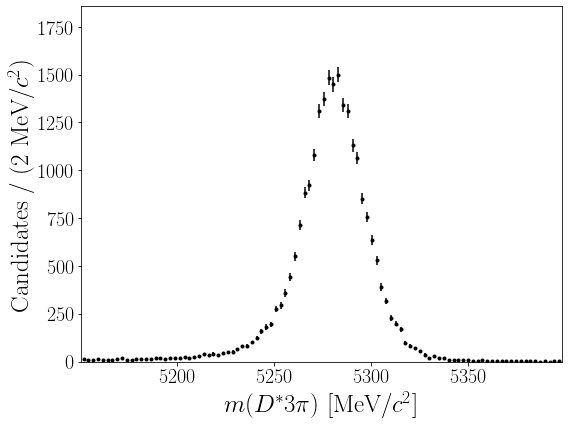

In [4]:
h.plot_hist_particle({name_data:df_MC},'B0_M', n_bins = 100, colors='black')

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_MC_twoCB


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($3\\pi$) [MeV/$c^2$]', ylabel='Candidates / (3e+01 MeV/$c^2$)'>)

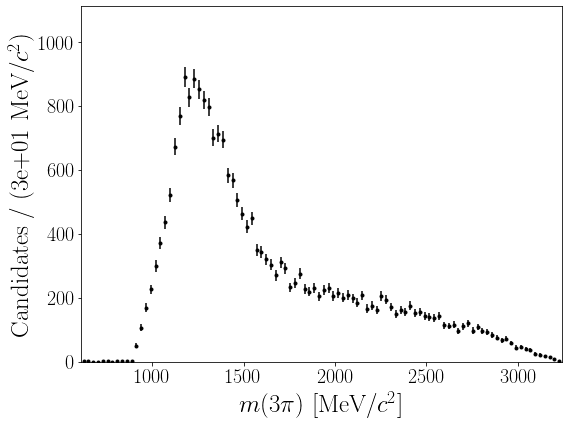

In [5]:
h.plot_hist_particle({name_data:df_MC},'tau_M', n_bins = 100, colors='black')

## A function to launch the fit

This function has been implemented in `scripts/fit.py`

## Double CB Fit of `B0_M` of the MC data

In [4]:
low = 5150.
high = 5400.
obs = zfit.Space("x", limits=(low, high))

In [5]:
mu_MC = zfit.Parameter("mu_MC", 5280., 5250., 5300.)
# sigma_MC = zfit.Parameter("sigma_MC", 20., 10., 60.)
sigmaL_MC = zfit.Parameter("sigmaL_MC", 13., 8., 20.)
sigmaR_MC = zfit.Parameter("sigmaR_MC", 21., 10., 30.)

alphaL_MC = zfit.Parameter("alphaL_MC", 1.8, 0.1, 8.)
alphaR_MC = zfit.Parameter("alphaR_MC", -2.2, -8., -0.1)
nL_MC = zfit.Parameter("nL_MC", 1.2, 0.01, 10.)
nR_MC = zfit.Parameter("nR_MC", 2.9, 0.01, 10.)
frac_MC = zfit.Parameter("frac_MC", 0.6, 0.1, 1.)

# frac_MC     0.6418     +/-   0.049       False
# alphaL_MC    1.758     +/-   0.073       False
# mu_MC         5281     +/-    0.13       False
# nL_MC        1.238     +/-    0.14       False
# sigmaL_MC    13.05     +/-    0.35       False
# alphaR_MC   -2.187     +/-    0.16       False
# nR_MC        2.995     +/-     1.2       False
# sigmaR_MC    21.26     +/-    0.79       False


In [6]:
# doubleCB_MC = zfit.pdf.DoubleCB(mu_MC, sigma_MC, alphaL_MC, alphaR_MC, nL_MC, nR_MC, obs=obs)
data_MC = zfit.Data.from_pandas(df_MC['B0_M'],obs=obs)

model_S, crystalBallL_S, crystalBallR_S = sum_crystalball(mu_MC, mu_MC,
                                                          sigmaL_MC, sigmaR_MC,
                                                          frac_MC, obs,                                                          
                                                          alphaL_MC, alphaR_MC, 
                                                          nL_MC, nR_MC
                                                         )

In [11]:
# result, params = launch_fit(doubleCB_MC, data_MC)
# result, params = launch_fit(doubleCB_MC, data_MC)
result, params = launch_fit(model_S, data_MC)
result, params = launch_fit(model_S, data_MC)


------------------------------------------------------------------
| FCN = 1.042e+05               |     Ncalls=122 (122 total)     |
| EDM = 0.000781 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name         value    minuit_hesse    at limit
---------  -------  --------------  ----------
frac_MC     0.6421     +/-   0.048       False
alphaL_MC    1.759     +/-   0.072       False
mu_MC   

Number of d.o.f. in the model:  8
Reduced chi2:  0.8949281048870986


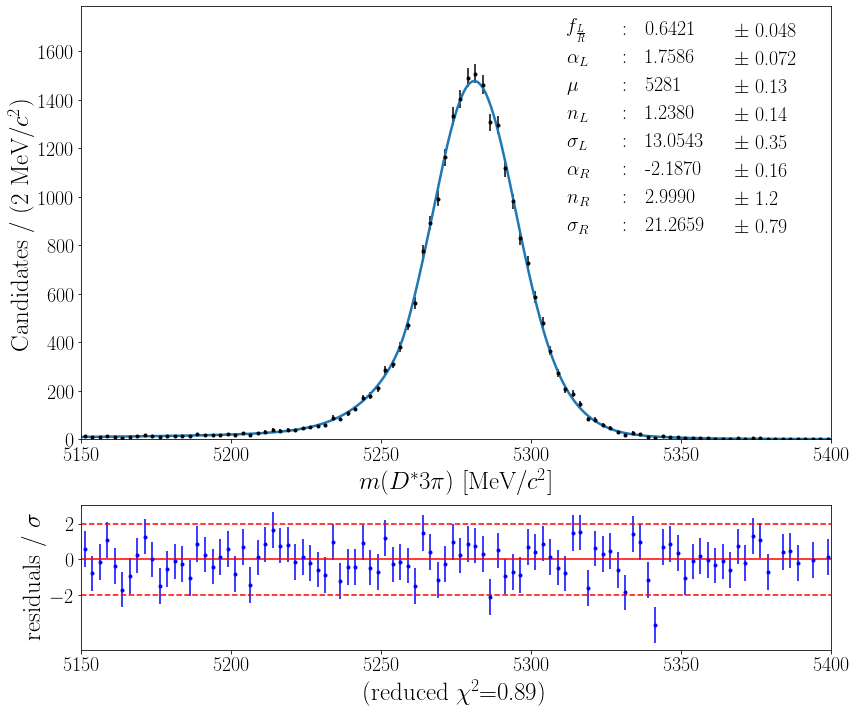

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/MC_twoCB/B0_M_MC_twoCB_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='Candidates / (2 MeV/$c^2$)'>,
 <AxesSubplot:xlabel='(reduced $\\chi^2$=0.89)', ylabel='residuals / $\\sigma$'>)

In [12]:
# plot_hist_fit_particle(df_MC,'B0_M', models = doubleCB_MC, obs=obs, n_bins = 100, mode_hist = False,
#               name_data = name_data, params=params, name_params=name_params_MC) 
plot_hist_fit_particle(df_MC,'B0_M', models = model_S, obs=obs, n_bins = 100, mode_hist = False,
              name_data = name_data, params=params, name_params=name_params_MC, type_models='mss', show_chi2=True)   

Number of d.o.f. in the model:  8
Reduced chi2:  1.0474847374738636


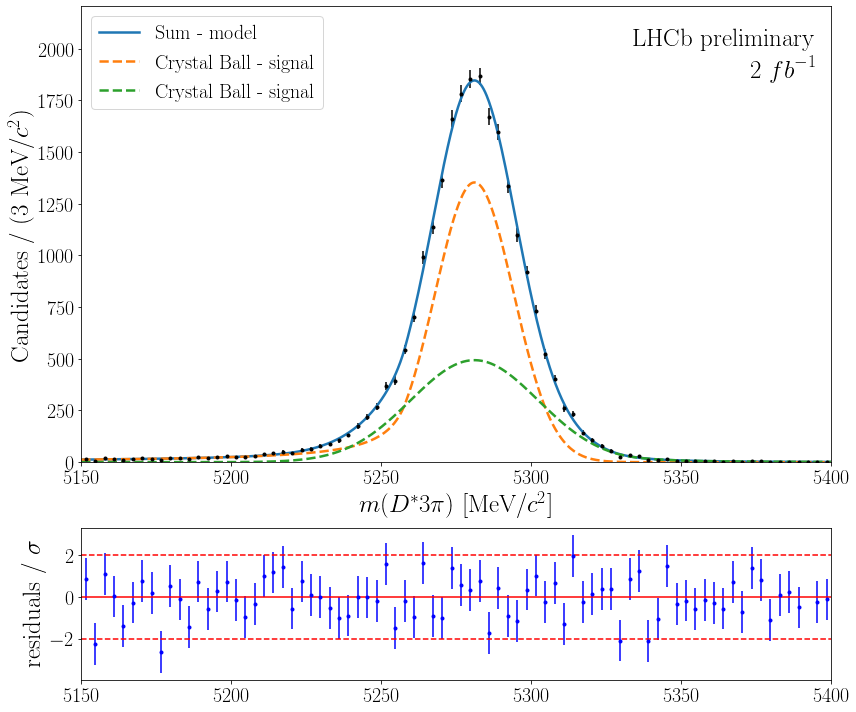

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/MC_twoCB/B0_M_MC_twoCB_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='Candidates / (3 MeV/$c^2$)'>,
 <AxesSubplot:ylabel='residuals / $\\sigma$'>)

In [13]:
plot_hist_fit_particle(df_MC,'B0_M', models = [model_S, crystalBallL_S, crystalBallR_S], 
                       name_models=['', '', ''],
                       type_models= 'mss',
                       obs=obs, n_bins = 80, mode_hist = False,
                       name_data = name_data, pos_text_LHC='right')

In [14]:
save_params(params, name_data, True, name_folder='MC')

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/MC/MC_twoCB_params.json
